Laboratorio 1
=============

Caracterización de la Volatilidad "Ex-post" del Precio Spot
===

In [2]:
library(ggplot2)

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
library(lubridate)

In [5]:
library(viridisLite)

In [6]:
#library(tseries)

In [7]:
#library(xts)

Usamos la función "read.csv" para leer un archivo CSV y almacenar el contenido en un dataframe.

El archivo es leido desde un repositorio en la nube (Cloud repository) de acceso libre (Zenodo.org).

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.11111086.svg)](https://doi.org/10.5281/zenodo.11111086)

In [8]:
data_cmg <- read.csv("https://zenodo.org/record/11111086/files/CMg_daily_weighted_average_2005_20223_sharing.csv", header = TRUE)

In [9]:
head(data_cmg) # muestra la cabecera y primeros registros del dataframe

,Time,Name_day,Price
,<chr>,<chr>,<dbl>
1,2005-01-01 00:00:00,Saturday,0.002801296
2,2005-01-02 00:00:00,Sunday,0.011459184
3,2005-01-03 00:00:00,Monday,0.048284044
4,2005-01-04 00:00:00,Tuesday,0.056741816
5,2005-01-05 00:00:00,Wednesday,0.060451817
6,2005-01-06 00:00:00,Thursday,0.048211718


In [10]:
str(data_cmg) # Muestra la estructura de los datos

'data.frame':	6939 obs. of  3 variables:
 $ Time    : chr  "2005-01-01 00:00:00" "2005-01-02 00:00:00" "2005-01-03 00:00:00" "2005-01-04 00:00:00" ...
 $ Name_day: chr  "Saturday" "Sunday" "Monday" "Tuesday" ...
 $ Price   : num  0.0028 0.0115 0.0483 0.0567 0.0605 ...


Notemos que el campo (la columna) "Time" ha sido leído como del tipo "character" (chr).
Para la correcta manipulación del campo tiempo, modificaremos el tipo de ese campo para que sea trabajado como de tipo "date" (fecha y hora).

In [11]:
data_cmg$Time <- as.Date(data_cmg$Time) # la función as.Date(value) retorna el valor "value" modificando el tipo a "date"

Modificamos también el campo (la columna) "Price" que venía expresado en "Soles/kWh", multiplicando por 1000 para que quede expresado en "Soles/MWh" de modo de tener una dimensión más habitual del precio spot. 

In [12]:
data_cmg$Price <- data_cmg$Price * 1000

In [13]:
head(data_cmg) # muestra la cabecera y primeros registros del dataframe

,Time,Name_day,Price
,<date>,<chr>,<dbl>
1,2005-01-01,Saturday,2.801296
2,2005-01-02,Sunday,11.459184
3,2005-01-03,Monday,48.284044
4,2005-01-04,Tuesday,56.741816
5,2005-01-05,Wednesday,60.451817
6,2005-01-06,Thursday,48.211718


In [14]:
str(data_cmg) # muestra la estructura de los datos

'data.frame':	6939 obs. of  3 variables:
 $ Time    : Date, format: "2005-01-01" "2005-01-02" ...
 $ Name_day: chr  "Saturday" "Sunday" "Monday" "Tuesday" ...
 $ Price   : num  2.8 11.5 48.3 56.7 60.5 ...


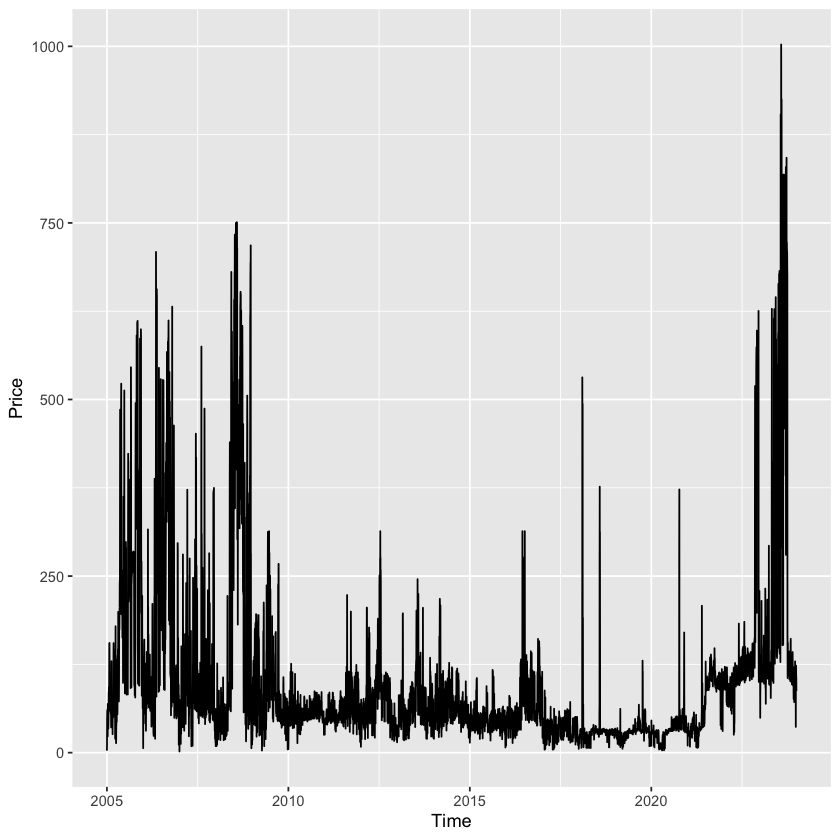

In [15]:
ggplot(data_cmg, # usamos la función "ggplot" para crear un gáfico de los datos contenido en "data_cmg"
       aes(x = Time, y = Price) # indicamos a ggplot que use la columna "Time" como eje "X" y "Precio" en "Y"
      ) +
    geom_line() # adicionalmente le indicamos a ggplot que el tipo de gráfico es de línea ("line")

Midiendo la volatilidad del precio spot con estadística descriptiva
==

En el gráfico anterior se muestra "la cara" de la variación diaria del precio spot expresado en "Soles/MWh".

Trabajaremos con los datos diarios y no horarios, porque nos interesa modelar el comportamiento del precio spot para horizontes superiores a los seis meses (semestrales) y de preferencia anuales.

Haremos ahora un primer ensayo de la medición de la volatilidad del precio spot, estimando la desviación standard de la serie de precios en todo el horizonte histórico de la serie de datos disponible (Enero 2005 - Dic 2023).

In [16]:
sd(data_cmg$Price)

[1] 124.1154

Ese resultado de la variabilidad del precio spot, no nos indica mucho como valor absoluto, por lo que necesitamos medirlo como proporción de algún valor de referencia. Por comodidad, usaremos como valor de referencia al valor medio (mean) del precio spot.

In [17]:
mean(data_cmg$Price)

[1] 100.3778

In [18]:
dispersion <- sd(data_cmg$Price)/mean(data_cmg$Price)
dispersion

[1] 1.236482

Este resultado indica que la dispersión de los valores del precio spot es de 123% del valor medio de dicha serie de precios.

Intentemos ahora "ver la cara" de esa dispersión de los precios spot distribuida en el tiempo. Primero veamos cómo se distribuyen los precios en cada mes de todos los años. Para ese fin, introduzcamos los campos que nos ayudarán a identificar el mes del año de cada dato de precio.

In [19]:
data_cmg <- data_cmg %>% # indicamos que trabajaremos con el dataframe llamado "data_cmg" 
  select(Time,           # y de ese dataframe seleccionaremos los campos "Time" además de
         Name_day,       # "Name_day" y
         Price           # "Price"
         ) %>%
  mutate(                # adicionalmente crearemos campos adicionales
    Month = month(Time), # tales como "Month" que almacena el número del mes de "Time" además de 
    Name_month = month(Time, label = TRUE), # "Name_month" que almacena el nombre del mes de "Time"
    Year = year(Time)    # y finalmente "Year" que almacena el número de año de "Time"
    )                    # el resultado de todo esto será asignado (reemplazando) el mismo dataframe "data_cmg".  

In [20]:
head(data_cmg) # muestra la cabecera y primeros registros del dataframe

,Time,Name_day,Price,Month,Name_month,Year
,<date>,<chr>,<dbl>,<dbl>,<ord>,<dbl>
1,2005-01-01,Saturday,2.801296,1,Jan,2005
2,2005-01-02,Sunday,11.459184,1,Jan,2005
3,2005-01-03,Monday,48.284044,1,Jan,2005
4,2005-01-04,Tuesday,56.741816,1,Jan,2005
5,2005-01-05,Wednesday,60.451817,1,Jan,2005
6,2005-01-06,Thursday,48.211718,1,Jan,2005



Ahora usaremos diagramas BoxPlot para visualizar la dispersión de los datos. Este diagrama genera una caja (Box) cuyo límite inferior representa el valor debajo del cual se encuentran el 25% de los datos (primer quartil). La línea gruesa del medio de la caja representa el valor debajo del cual se encuentran el 50% de los datos (la mediana). Y el límite superior de la caja representa el valor debajo del cual se encuentran el 75% de los datos (tercer quartil).

La línea vertical continua que atraviesa el BoxPlot une al valor mínimo y el valor máximo del grupo de datos. Por encima del valor máximo se muestras los "outliers" del grupo.

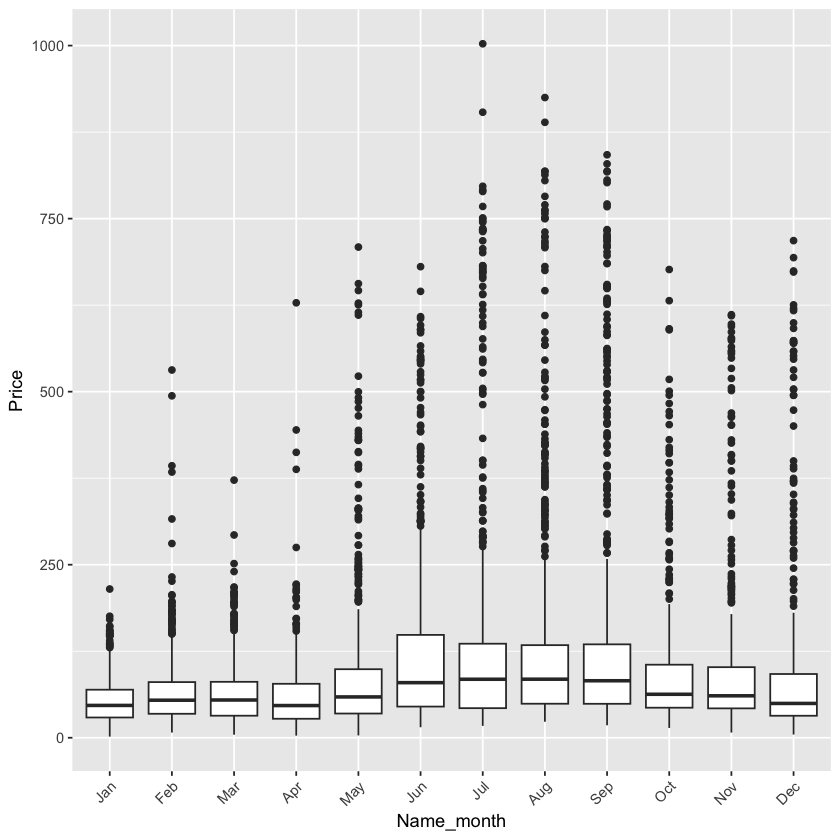

In [21]:
data_cmg %>%
  ggplot(aes(x=Name_month, y=Price)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

La visualización mensual del histórico de los precios nos permite verificar que la dispersión de estos valores de precio es amplia. Nótese que la mediana (50% de los datos) esta por debajo de 100 y el 75% de los datos está por debajo de 150. No obstante, la cantidad de outliers es notable y éstos toman valores desde cercanos a 100 hasta cercanos a 1,000.     

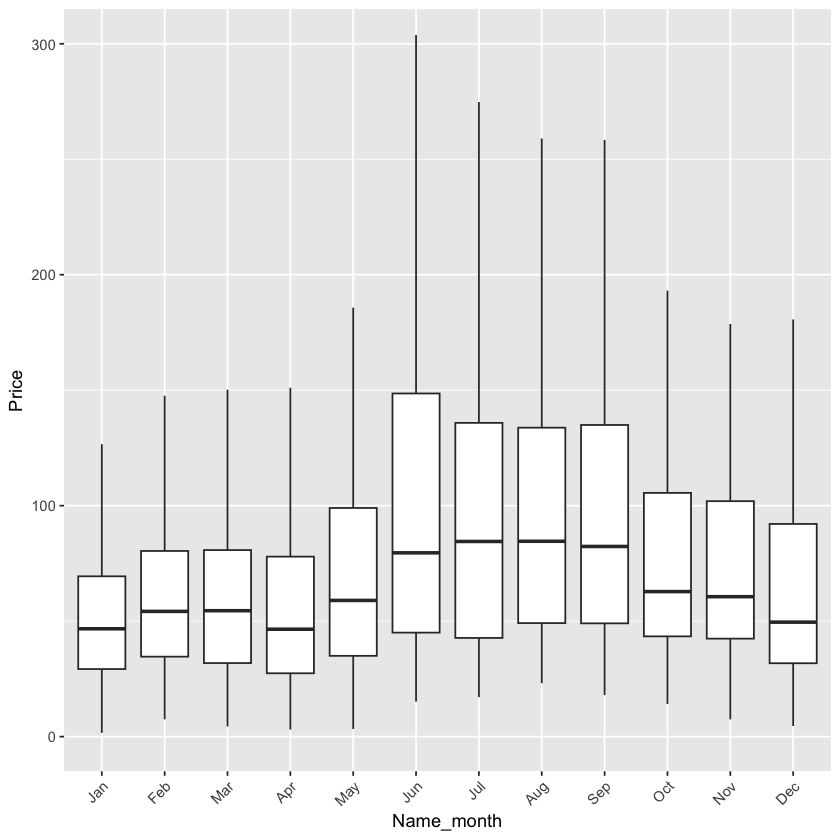

In [22]:
data_cmg %>%
  ggplot(aes(x=Name_month, y=Price)) +
  geom_boxplot(outlier.shape = NA) +         # en esta línea indicamos que los outliers no sean mostrados
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_cartesian(ylim = c(0, 300))          # en esta línea restringimos la coordenada "y" a 300 en el límite superior

Hasta el momento hemos intentado "verle la cara" a la dispersión (volatilidad) del precio spot dentro de cada mes del año, tomando cada mes como fijo y observando la distribución de los valores del precio de los años disponibles (2005-2023). Ahora tomemos otro punto de vista y visualicemos la distribución de los precios dentro de cada año, de modo que visualicemos la evolución de la dispersión de los precios en el tiempo.

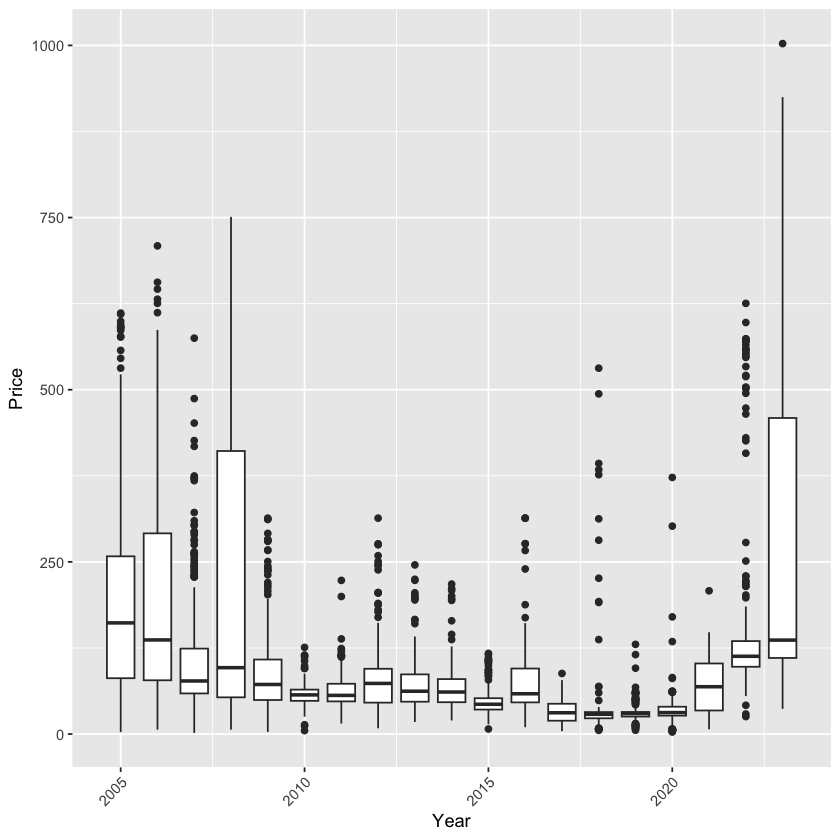

In [23]:
data_cmg %>%
  ggplot(aes(x=Year, y=Price, group = Year)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

Como se puede observar del gráfico anterior, a lo largo del tiempo se visualiza un comportamiento variado de la dispersión de los precios. Nótese que durante los años entre el 2010 y 2020, los precios spot estuvieron mucho más concentrados (menos dispersos) que antes del 2010 y depués del 2020. El año 2023 tuvo un tamaño de dispersión muy similar al del año 2008.

De aquí en adelante trabajaremos con los datos de la "serie de tiempo" de los precios. Vale decir, nuestro análisis del riesgo (dispersión, volatilidad) será realizado tomando en cuenta la línea de tiempo de los datos. De hecho, para este fin usaremos la teoría estadística especializada en el análisis de "series de tiempo".

En análisis financiero es usual trabajar con las estadísticas de los retornos de los precios en lugar de trabajar con los valores nominales de los precios directamente. El retorno es definido como la variación del valor corriente respecto al valor del periodo previo. Por esta razón, crearemos una columna que contenga los valores del día previo. Esto se logra con la función "lag".

In [24]:
data_cmg <- data_cmg %>%
    select(
        Time, Name_day, Price, Month, Name_month, Year # Selecciona todos los campos existentes y ...
        ) %>%
    mutate(
        lag_Price = lag(Price) # añade un campo adicional con el valor del dia previo
        )                      # usaremos este campo para hacer cálculos de la variación diaria

In [25]:
head(data_cmg)

,Time,Name_day,Price,Month,Name_month,Year,lag_Price
,<date>,<chr>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>
1,2005-01-01,Saturday,2.801296,1,Jan,2005,NA
2,2005-01-02,Sunday,11.459184,1,Jan,2005,2.801296
3,2005-01-03,Monday,48.284044,1,Jan,2005,11.459184
4,2005-01-04,Tuesday,56.741816,1,Jan,2005,48.284044
5,2005-01-05,Wednesday,60.451817,1,Jan,2005,56.741816
6,2005-01-06,Thursday,48.211718,1,Jan,2005,60.451817


Asimismo, en análisis financiero es usual realizar una transformación de medida de modo de trabajar con los logaritmos de los precios. Esta transformación responde a evidencia empírica que demuestra que la distribución de probabilidad del logaritmo de los precios tiende a una distribución normal. Este es un supuesto que se revisa y verifica antes de la aplicación de los modelos de las series de tiempo en finanzas.

Recordemos que Log(ST) - Log(St) = Log(ST/St) ... ST/St es un proxy del retorno o variacion en el tiempo.

De este modo, crearemos una columna con el cálculo de la diferencia de los logaritmos de los precios.

In [26]:
data_cmg <- data_cmg %>%
    select(
        Time, Name_day, Price, Month, Name_month, Year, lag_Price # Selecciona todos los campos existentes y ...
        ) %>%
    mutate(
        diff_log = log(Price) - log(lag_Price) # añade un campo adicional con la diferencia de los logaritmos del dia corriente y el día previo
        )

In [27]:
head(data_cmg)

,Time,Name_day,Price,Month,Name_month,Year,lag_Price,diff_log
,<date>,<chr>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>
1,2005-01-01,Saturday,2.801296,1,Jan,2005,NA,NA
2,2005-01-02,Sunday,11.459184,1,Jan,2005,2.801296,1.4087093
3,2005-01-03,Monday,48.284044,1,Jan,2005,11.459184,1.4383096
4,2005-01-04,Tuesday,56.741816,1,Jan,2005,48.284044,0.1614103
5,2005-01-05,Wednesday,60.451817,1,Jan,2005,56.741816,0.0633352
6,2005-01-06,Thursday,48.211718,1,Jan,2005,60.451817,-0.2262445


Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


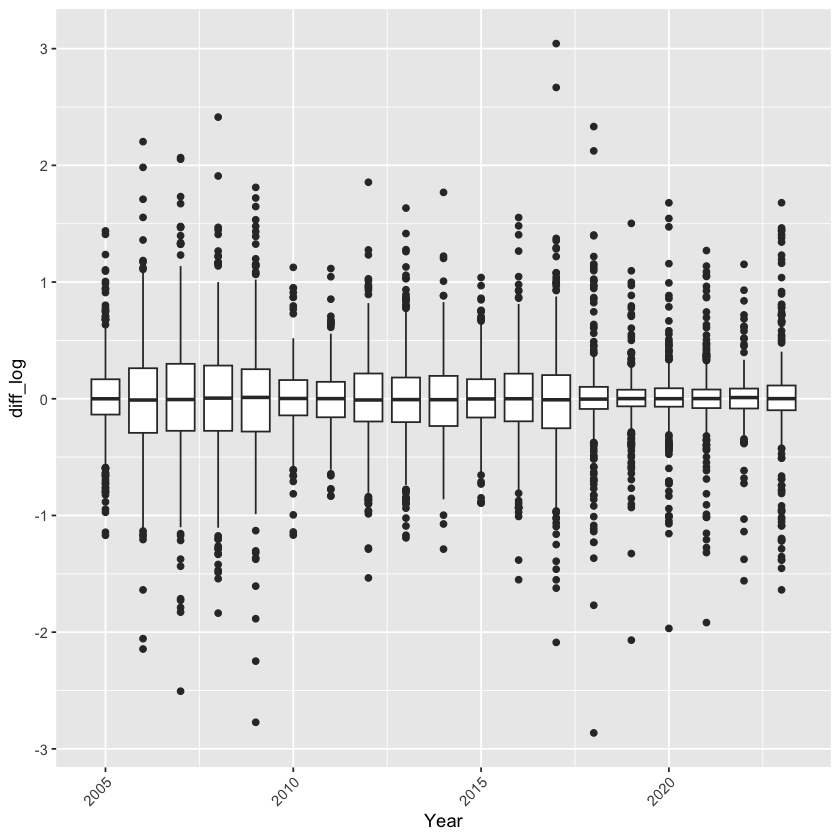

In [28]:
data_cmg %>%
  ggplot(aes(x=Year, y=diff_log, group = Year)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))

En el gráfico anterior se tiene una visualización de la dispersión de los retornos diarios del precio spot. Pasemos ahora a cuantificar esa dispersión en una medida que llamaremos volatilidad del precio spot en base a la desviacion estándar de los retornos diarios de dicho precio spot. Haremos ese cálculo agrupando el conjunto de datos de manera anual, es decir para cada año de los datos disponibles.

In [30]:
vol_daily <- data_cmg %>%
    group_by(Year) %>%
    summarise(vol = sd(diff_log, na.rm = TRUE))
vol_daily

Year,vol
<dbl>,<dbl>
2005,0.3726886
2006,0.5376084
2007,0.5988422
2008,0.5531619
2009,0.5413029
2010,0.2829837
2011,0.2820062
2012,0.4219117
2013,0.4237546


Nótese que este resultado previo ha estimado la volatilidad de los datos diarios. En análisis financiero es usual expresar a la volatilidad en términos de ratio anual. Por esta razón tenemos que convertir ese resultado de volatilidad diaria, en volatilidad anual. Esto se hace multiplicando por la raiz cuadrada de 365, ya que tenemos 365 valores diarios que componen el ratio anual. 

In [31]:
vol_yearly <- vol_daily %>%
    select(Year, vol) %>%
    mutate(
        vol_year = sqrt(365)*vol
        )
vol_yearly

Year,vol,vol_year
<dbl>,<dbl>,<dbl>
2005,0.3726886,7.120205
2006,0.5376084,10.270994
2007,0.5988422,11.440863
2008,0.5531619,10.568144
2009,0.5413029,10.341577
2010,0.2829837,5.406396
2011,0.2820062,5.387720
2012,0.4219117,8.060612
2013,0.4237546,8.095820


Análsis de Serie de Tiempo del Precio Spot
===

El programa "R" tiene un conjunto de funciones (agrupadas en el paquete "xts", eXtensible Time Series) que son especializadas en el análisis de series de tiempo. Todas estas funciones trabajan sobre una estructura de datos especial que relaciona los datos de una tabla con un índice que organiza estos datos en una línea de tiempo.

In [30]:
#spot_price <- xts(data_cmg$Price, order.by = data_cmg$Time)

In [31]:
#head(spot_price)

In [32]:
#log_ror_spot_price <- diff(log(spot_price), na.pad = FALSE)

In [33]:
#apply.yearly(log_ror_spot_price,sd)

Asignemos ese resultado de valores a una variable que llamaremos "sd_a_nivel" ya que almacena las desviaciones estandar de los precios nominales ("a nivel").

In [34]:
#plot(spot_price)

In [35]:
#temp <- spot_price

In [36]:
#adf.test(coredata(temp))